# Рейтинги Шоколадных батончиков

Проведение __Разведочного анализа данных__ для набора данных про рейтинг шоколадных батончиков

[Ссылка на Kaggle](https://www.kaggle.com/rtatman/chocolate-bar-ratings)

## Импорт библиотек

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

plt.style.use('ggplot')

## Загрузка датасета

In [2]:
cacao_df = pd.read_csv('flavors_of_cacao.csv', sep=',')

In [3]:
# Исправление названий признаков
cacao_df.columns = ['Company', 'Specific_Bean_Origin', 'REF', 'Review_Date', 
                    'Cocoa_Percent', 'Company_Location', 'Rating', 'Bean_Type', 
                    'Bean_Origin']

In [4]:
cacao_df.sample(5)

,Company,Specific_Bean_Origin,REF,Review_Date,Cocoa_Percent,Company_Location,Rating,Bean_Type,Bean_Origin
41,Alexandre,"La Dalia, Matagalpa",1944,2017,70%,Netherlands,3.5,"Criollo, Trinitario",Nicaragua
673,French Broad,"Palo Blanco, Chulucanas",1042,2013,66%,U.S.A.,3.5,,Peru
1700,Valrhona,Gran Couva 2005 P.,75,2006,64%,France,2.5,Trinitario,Trinidad
1583,Stone Grindz,"Ecuador, Twilght Dark",1291,2014,70%,U.S.A.,3.5,,Ecuador
1291,Pierre Marcolini,Fleur de Cacao,166,2007,85%,Belgium,3.5,Blend,Venezuela/ Ghana


## Описание признаков

* __Company__ - название компании-производителя шоколадных батончиков
* __Specific_Bean_Origin__ - конкретный географический регион, где выращивают какао-бобы
* __REF__ - значение, связанное с датой введения отзыва в базу. Чем значение выше, тем позже отзыв был добавлен в базу данных
* __Review_Date__ - дата публикации отзыва
* __Cocoa_Percent__ - процентное содержание какао
* __Company_Location__ - страна-производитель
* __Rating__ - экспертная оценка шоколадного батончика
* __Bean_Type__ - сорт какао-боба
* __Bean_Origin__ - географический регион, где выращивают какао-бобы

## Описание набора данных

In [5]:
cacao_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1795 non-null   object 
 1   Specific_Bean_Origin  1795 non-null   object 
 2   REF                   1795 non-null   int64  
 3   Review_Date           1795 non-null   int64  
 4   Cocoa_Percent         1795 non-null   object 
 5   Company_Location      1795 non-null   object 
 6   Rating                1795 non-null   float64
 7   Bean_Type             1794 non-null   object 
 8   Bean_Origin           1794 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 126.3+ KB


In [6]:
cacao_df.describe()

,REF,Review_Date,Rating
count,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,3.185933
std,552.886365,2.927210,0.478062
min,5.000000,2006.000000,1.000000
25%,576.000000,2010.000000,2.875000
50%,1069.000000,2013.000000,3.250000
75%,1502.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


In [7]:
cacao_df.describe(include='object')

,Company,Specific_Bean_Origin,Cocoa_Percent,Company_Location,Bean_Type,Bean_Origin
count,1795,1795,1795,1795,1794,1794
unique,416,1039,45,60,41,100
top,Soma,Madagascar,70%,U.S.A.,,Venezuela
freq,47,57,672,764,887,214


## Заполнение пропусков

In [78]:
cacao_df.Bean_Type.fillna('Unknown', inplace=True)
cacao_df.Bean_Type = cacao_df.Bean_Type.apply(lambda bt: bt if bt != '\xa0' else 'Unknown')

cacao_df.Bean_Origin.fillna('Unknown', inplace=True)
cacao_df.Bean_Origin = cacao_df.Bean_Origin.apply(lambda bo: bo if bo != '\xa0' else 'Unknown')

# Анализ количественных данных

In [10]:
# Переводим процент какао в количественную переменную
cacao_df.Cocoa_Percent = cacao_df.Cocoa_Percent.apply(lambda cp: cp[:-1]).astype(float)

In [11]:
cacao_df.describe()

,REF,Review_Date,Cocoa_Percent,Rating
count,1795.000000,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,71.698329,3.185933
std,552.886365,2.927210,6.323118,0.478062
min,5.000000,2006.000000,42.000000,1.000000
25%,576.000000,2010.000000,70.000000,2.875000
50%,1069.000000,2013.000000,70.000000,3.250000
75%,1502.000000,2015.000000,75.000000,3.500000
max,1952.000000,2017.000000,100.000000,5.000000


## REF

<AxesSubplot:>

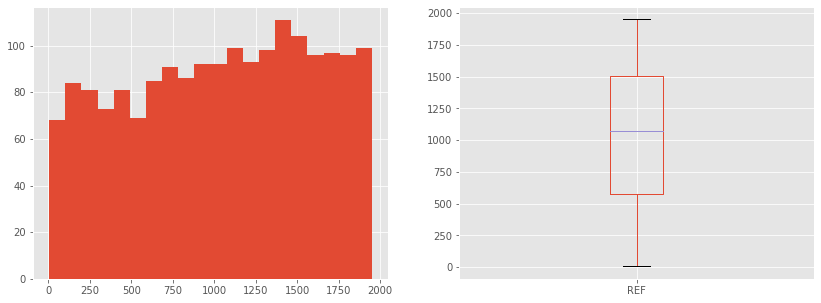

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
cacao_df.REF.hist(bins=20, ax=axes[0])
cacao_df.boxplot(column='REF', ax=axes[1])

Как видно, REF не содержит выбросов

## Review_Date

<AxesSubplot:>

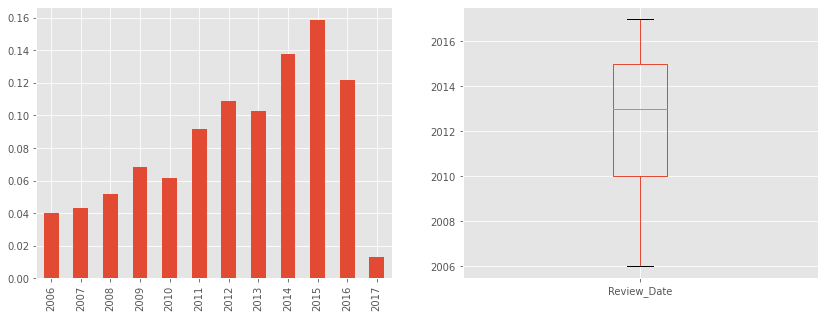

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

cacao_df.Review_Date.value_counts(normalize=True).sort_index().plot(kind='bar', ax=axes[0]);
cacao_df.boxplot(column='Review_Date', ax=axes[1])

Review_Date также не содержит выбросов, причем количество добавлений отзывов растет с годом, но до 2015 года

## Cocoa_Percent

<AxesSubplot:>

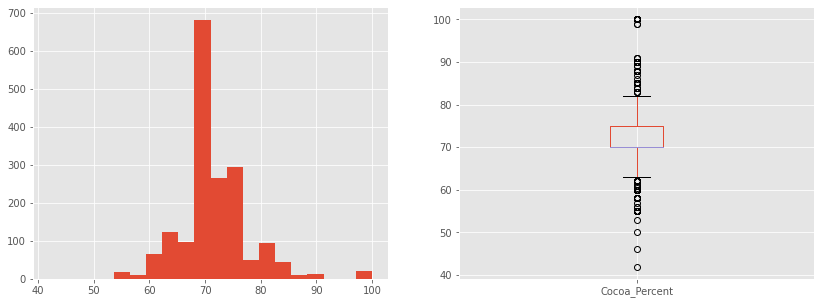

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

cacao_df.Cocoa_Percent.hist(bins=20, ax=axes[0])
cacao_df.boxplot(column='Cocoa_Percent', ax=axes[1])

По графикам видно, что переменная имеет выбросы в обоих направлениях

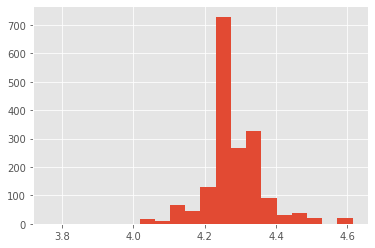

In [17]:
cacao_df.Cocoa_Percent.apply(lambda w: np.log(w + 1)).hist(bins=20);

Логарифмирование не даст улучшения, так как переменная имеет тяжелые хвосты в том и другом направлении

## Rating

<AxesSubplot:>

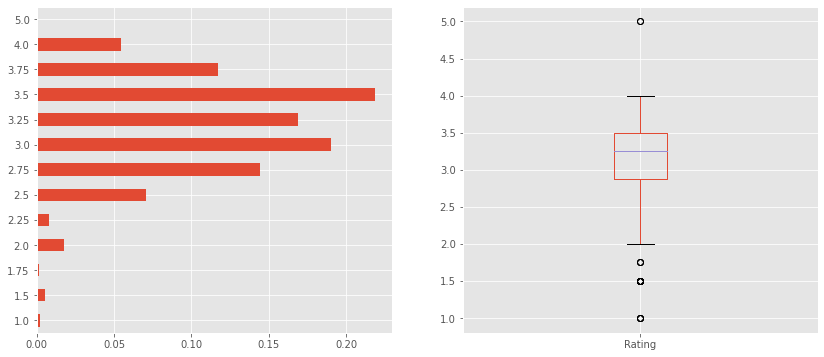

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

cacao_df.Rating.value_counts(normalize=True).sort_index().plot(kind='barh', ax=axes[0])
cacao_df.boxplot(column='Rating', ax=axes[1])

In [22]:
cacao_df.Rating.value_counts().sort_index()

1.00      4
1.50     10
1.75      3
2.00     32
2.25     14
2.50    127
2.75    259
3.00    341
3.25    303
3.50    392
3.75    210
4.00     98
5.00      2
Name: Rating, dtype: int64

Переменная имеет выбросы, связанные с 2 максимальными оценками и 17 минимальными оценками

# Анализ совокупности количественных признаков

Рассмотрим, влияет ли процентное содержание какао на оценку

<AxesSubplot:xlabel='Cocoa_Percent', ylabel='Rating'>

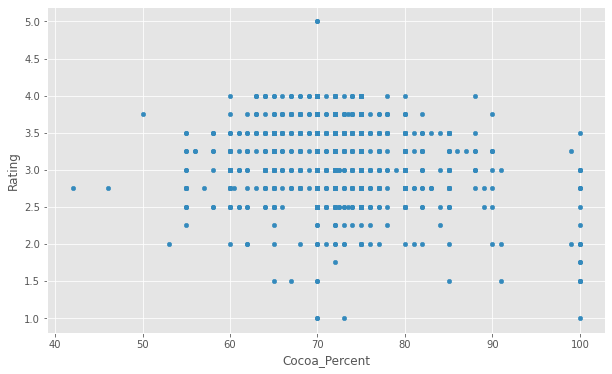

In [30]:
fig, ax = plt.subplots(figsize=(10, 6))
cacao_df.plot(x='Cocoa_Percent', y='Rating', kind='scatter', ax=ax)

Удивительно, но максимальную оценку получили батончики, имеющие 70 процентное содержание какао.

100-процентное содержание какао не обеспечивает высокой оценки. Возможно это связано с тем, что эксперты считали, что высокое содержание какао улучшит вкус и ощущения, но этого не происходило и эксперт разочаровывался в батончике с высоким содержанием шоколада.

Теперь узнаем о корреляции между двумя этими признаками

In [44]:
correlation = cacao_df[['Cocoa_Percent', 'Rating']].corr().iloc[0, 1]
print(correlation)

-0.1648201776242442


Видно, что линейная зависимость очень слабая

Построим графики для оценки зависимости между остальными признаками

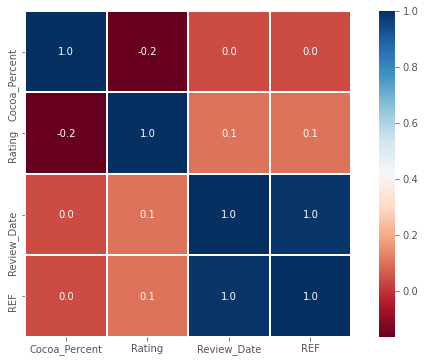

In [41]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(cacao_df[['Cocoa_Percent', 'Rating', 'Review_Date', 'REF']].corr( ), square=True,
              annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu");

Заметим, что признаки REF и Review_Date зависимы и не оказывают значительного влияния на другие признаки. Перед постройкой модели нужно будет удалить один из признаков времени, чтобы не навредить модели.

# Анализ категориальных данных

In [45]:
cacao_df.describe(include="object")

,Company,Specific_Bean_Origin,Company_Location,Bean_Type,Bean_Origin
count,1795,1795,1795,1795,1794
unique,416,1039,60,41,100
top,Soma,Madagascar,U.S.A.,Unknown,Venezuela
freq,47,57,764,888,214


## Company

Посмотрим на 10 компаний с наибольшим количеством оценок

In [107]:
company_series = cacao_df.Company.value_counts().sort_values(ascending=False)[:20]
company_series

Soma                          47
Bonnat                        27
Fresco                        26
Pralus                        25
A. Morin                      23
Arete                         22
Domori                        22
Guittard                      22
Valrhona                      21
Hotel Chocolat (Coppeneur)    19
Coppeneur                     18
Mast Brothers                 18
Zotter                        17
Scharffen Berger              17
Rogue                         16
Artisan du Chocolat           16
Dandelion                     16
Smooth Chocolator, The        16
Szanto Tibor                  15
Pierre Marcolini              14
Name: Company, dtype: int64

Если интерпретировать оценки как оценки на разные шоколадные батончики, то лидером по количеству батончиков выступает компания Soma

## Specific_Bean_Origin

In [52]:
cacao_df.Specific_Bean_Origin.value_counts().sort_values(ascending=False)[:10]

Madagascar            57
Peru                  45
Ecuador               42
Dominican Republic    37
Venezuela             21
Sambirano             19
Chuao                 19
Ocumare               17
Papua New Guinea      15
Ghana                 15
Name: Specific_Bean_Origin, dtype: int64

## Bean_Origin

In [79]:
cacao_df.Bean_Origin.value_counts().sort_values(ascending=False)[:10]

Venezuela             214
Ecuador               193
Peru                  165
Madagascar            145
Dominican Republic    141
Unknown                74
Nicaragua              60
Brazil                 58
Bolivia                57
Belize                 49
Name: Bean_Origin, dtype: int64

## Bean_Type

In [104]:
bean_type_series = cacao_df.Bean_Type.value_counts().sort_values(ascending=False)[:10]
bean_type_series

Unknown                 888
Trinitario              419
Criollo                 153
Forastero                87
Forastero (Nacional)     52
Blend                    41
Criollo, Trinitario      39
Forastero (Arriba)       37
Criollo (Porcelana)      10
Trinitario, Criollo       9
Name: Bean_Type, dtype: int64

## Company_Location

In [90]:
company_location_series = cacao_df.Company_Location.value_counts().sort_values(ascending=False)[:20]
company_location_series

U.S.A.         764
France         156
Canada         125
U.K.            96
Italy           63
Ecuador         54
Australia       49
Belgium         40
Switzerland     38
Germany         35
Austria         26
Spain           25
Colombia        23
Hungary         22
Venezuela       20
Brazil          17
New Zealand     17
Japan           17
Madagascar      17
Peru            17
Name: Company_Location, dtype: int64

Можно сказать, что США является лидером среди стран по производству шоколадных батончиков, но какие это батончики?

# Анализ совокупности количественных и категориальных признаков

### Зависимость оценки от страны

In [94]:
cacao_df.Company_Location = cacao_df.Company_Location.apply(lambda cl: cl if cl in company_location_series.index else 'other')

<AxesSubplot:title={'center':'Rating'}, xlabel='Company_Location'>

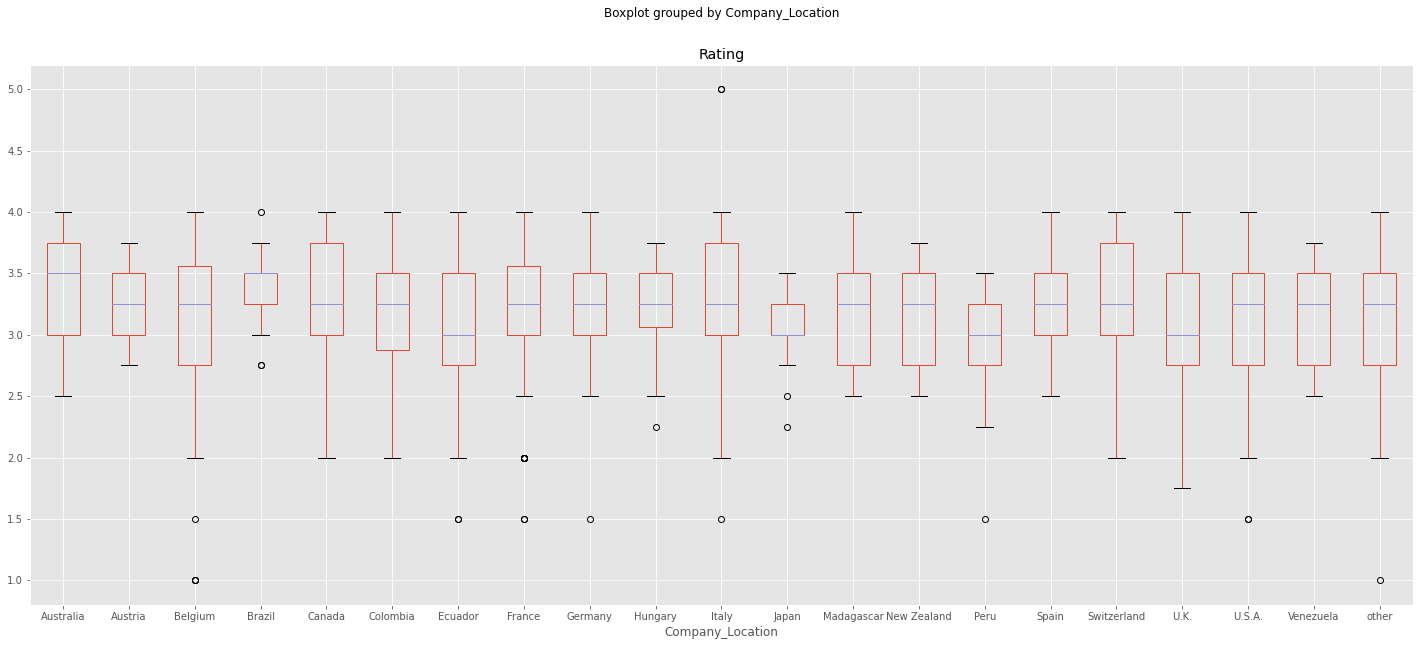

In [103]:
cacao_df.boxplot('Rating', by='Company_Location', figsize=(24, 10))

Глядя на медианно значение оценки представленных ящиков с усами, можно выделить страны, шоколад которых эксперты оценивают достаточно высоко. Это Австралия и Бразилия. Остальные страны имеют схожие медианные значения оценок.

По графику также видно, что самая низкая оценка принадлежит шоколаду из Бельгии, а самая высокая оценка приналежит шоколаду из Италии.

### Зависимость оценки от типа какао-боба

In [105]:
cacao_df.Bean_Type = cacao_df.Bean_Type.apply(lambda bt: bt if bt in bean_type_series.index else 'other')

<AxesSubplot:title={'center':'Rating'}, xlabel='Bean_Type'>

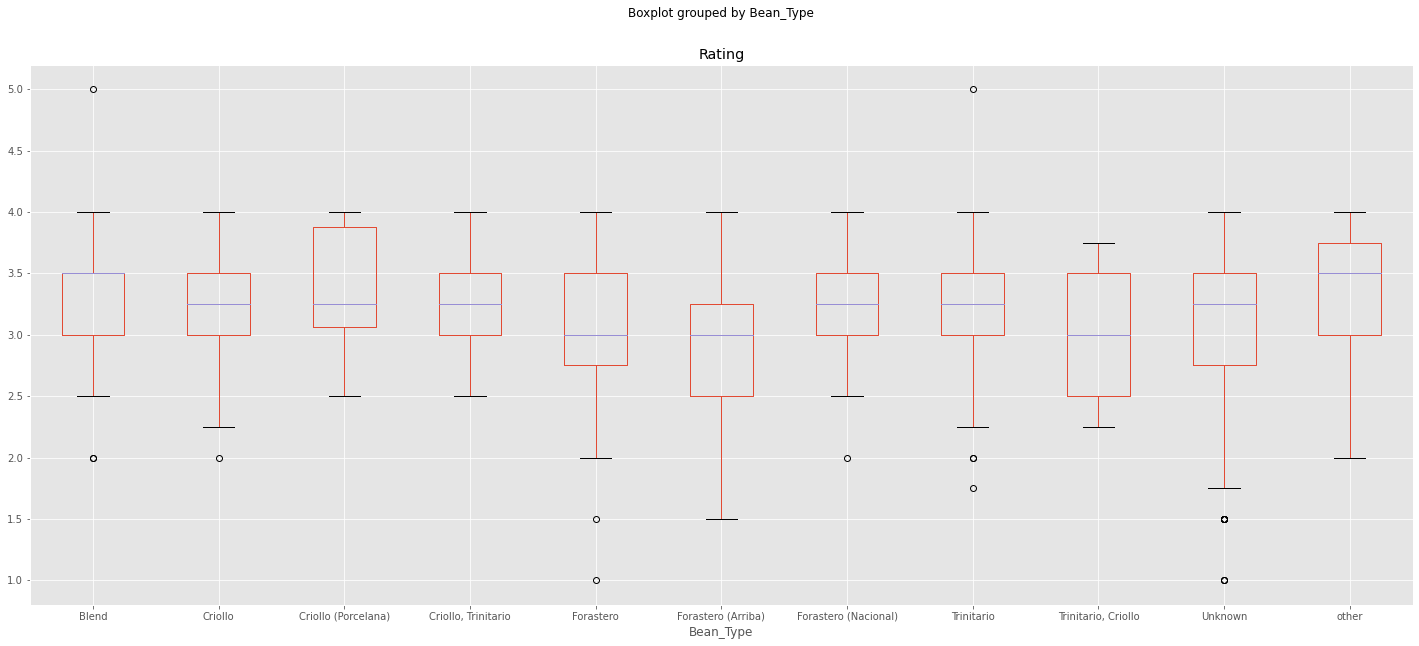

In [106]:
cacao_df.boxplot('Rating', by='Bean_Type', figsize=(24, 10))

Бобы типа Blend и Trinitario завоевали самые высокие оценки засчет шоколадов, которые были произведенены из этих бобов.

### Зависимость оценки от компании

In [109]:
cacao_df.Company = cacao_df.Company.apply(lambda c: c if c in company_series.index else 'other')

<AxesSubplot:title={'center':'Rating'}, xlabel='Company'>

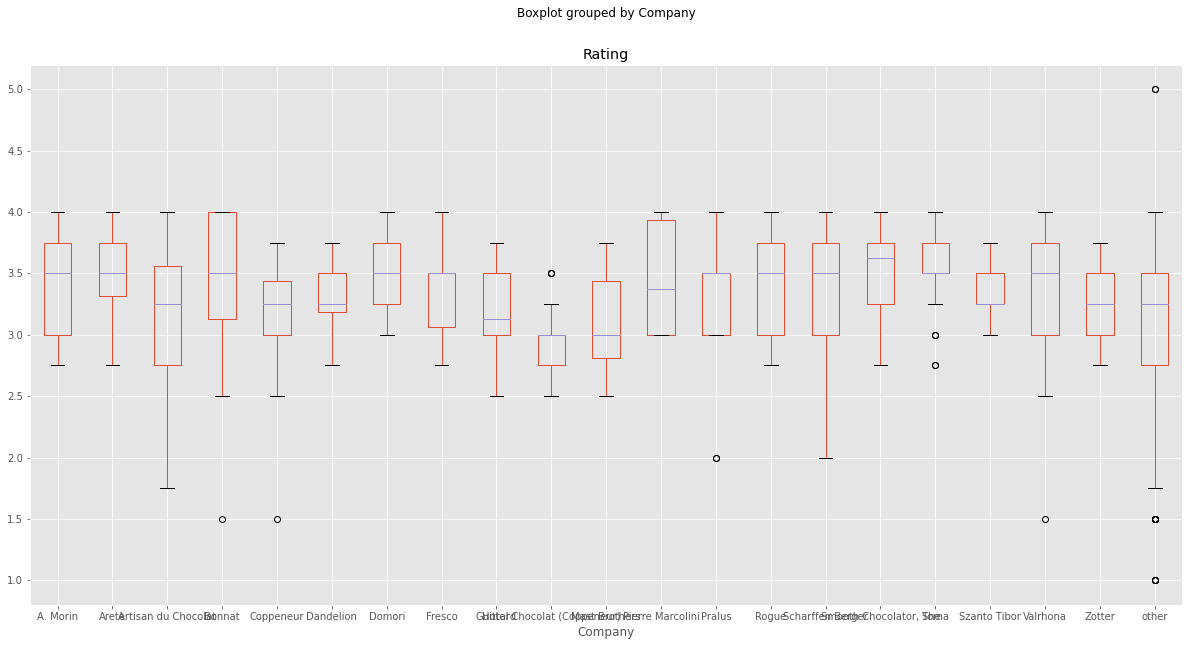

In [112]:
cacao_df.boxplot('Rating', by='Company', figsize=(20, 10))

По графику видно, что лучшая медианная оценка достигается у компани __The Smooth Chocolator__

А лучшие шоколадные батончики оказались в группу other, что наталкивает на мысль о том, что лучшие шоколады производятся компаниями, у которых небольшой ассортимент шоколада (поэтому и оценок меньше).